## Kaggle Titanic

In [21]:
%%bash
git add Titanic.ipynb
git commit -m 'Added some numerical distribution plots'
git push

[master b5ce9e3] Adding some basic code from prvious working file_2
 1 file changed, 211 insertions(+), 17 deletions(-)


To github.com:Theerit/Kaggle_Titanic.git
   22bc806..b5ce9e3  master -> master


As usual, import all neccasary stuff into the notebook

In [2]:
%matplotlib inline 
import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn.model_selection

/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


First, I will start by loading the data in panda dataframe and do some EDA.

In [5]:
train = pd.read_csv('Train.csv')
#test = pd.read_csv('Test.csv')
print(train.shape)

(891, 12)


Take a peek look at raw data table.

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It appears that the test data has no label(answer class) and seems to serve submission function. Cross validation and model evaluation will be done based on the data provided in Train.csv file only. Next, split dataframe into X and Y dataframe where X store the data while Y store the label.

In [25]:
X = train.copy()
X = X.drop('Survived',axis=1)
X = X.drop('PassengerId',axis=1)  # Shouldn't relate to survival chance
Y = pd.DataFrame(train['Survived'])

Lets take a look at class (Survived) distribution, the distribution is slightly skew where more passengers didn't survive.

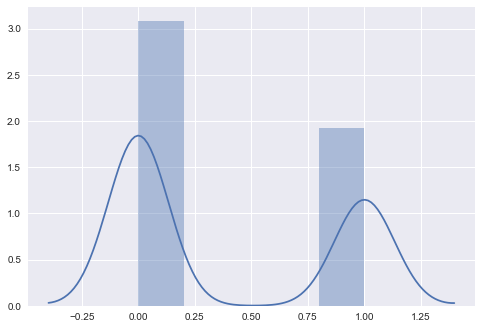

In [12]:
#Y_dist=pd.DataFrame(Y.label.value_counts())
#Y_dist = Y_dist.reset_index()
#Y_dist.columns = ['label','count']
#Y_dist = Y_dist.set_index('label').sort_index().reset_index()
sns.distplot(Y);

Sanitizing data, finding all NaN data in X

In [32]:
X.isnull().any()

Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

So Age,Cabin and Embarked have NaN value. Drop the missing value rows.

In [35]:
X = X.dropna()
X.isnull().any()

Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin       False
Embarked    False
dtype: bool

Take a look at each atrributes distribution.

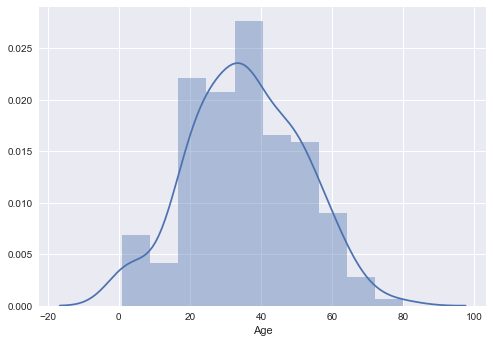

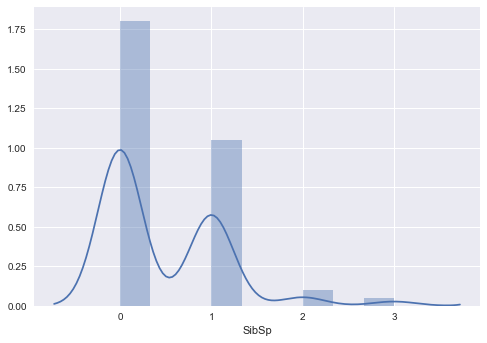

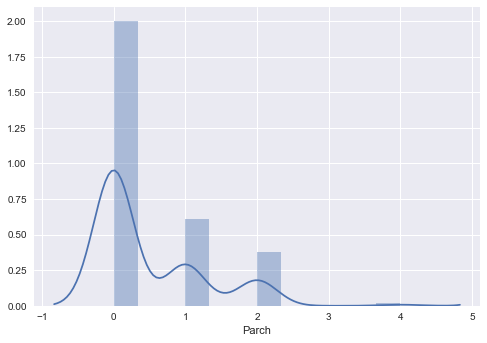

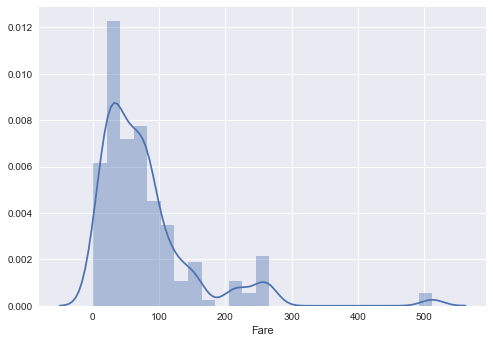

In [43]:
#Divide Numerical and Categorical attributes
#Pclass is actually categorical
num_attri = ['Age','SibSp','Parch','Fare']
cat_attri = [column for column in train if column not in num_attri]
#print(num_attri)
#print(cat_attri)
#Plot numerical variables
for i,column in enumerate(num_attri):
    #print(column)
    plt.figure(i)
    sns.distplot(X[column])